<a href="https://colab.research.google.com/github/Sahanasd2003/1.-Global-Ad-Performance-Dashboard-./blob/main/Global_Ad_Performance_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-43-0cf264cb7641>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='campaign', y='clicks', data=df, palette='Blues')


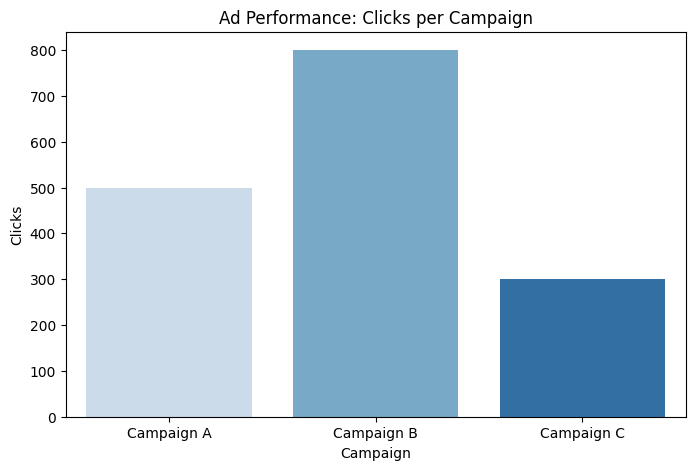

None

In [43]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# 1. Setup SQLite Database
def setup_database():
    conn = sqlite3.connect('ad_performance.db')
    cursor = conn.cursor()
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS ad_data (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            campaign TEXT,
            source TEXT,
            medium TEXT,
            impressions INTEGER,
            clicks INTEGER,
            cost REAL
        )
    ''')
    conn.commit()
    conn.close()

# 2. Insert Mock Data
def insert_mock_data():
    conn = sqlite3.connect('ad_performance.db')
    cursor = conn.cursor()
    data = [
        ('Campaign A', 'Google', 'CPC', 10000, 500, 200.50),
        ('Campaign B', 'Facebook', 'CPC', 15000, 800, 350.75),
        ('Campaign C', 'Twitter', 'Organic', 5000, 300, 100.25)
    ]
    cursor.executemany('INSERT INTO ad_data (campaign, source, medium, impressions, clicks, cost) VALUES (?, ?, ?, ?, ?, ?)', data)
    conn.commit()
    conn.close()

# 3. API Endpoint to Fetch Data
def get_ad_performance():
    conn = sqlite3.connect('ad_performance.db')
    df = pd.read_sql_query('SELECT * FROM ad_data', conn)
    conn.close()
    return jsonify(df.to_dict(orient='records'))

# 4. Generate Visualization
def generate_visualization():
    conn = sqlite3.connect('ad_performance.db')
    df = pd.read_sql_query('SELECT * FROM ad_data', conn)
    conn.close()

    plt.figure(figsize=(8,5))
    sns.barplot(x='campaign', y='clicks', data=df, palette='Blues')
    plt.title('Ad Performance: Clicks per Campaign')
    plt.xlabel('Campaign')
    plt.ylabel('Clicks')
    plt.savefig('ad_performance.png')  # Save output image
    display(plt.show())

# 5. Run Everything
if __name__ == '__main__':
    setup_database()
    insert_mock_data()
    generate_visualization()

